House Price Prediction

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load California Housing Dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [4]:
# Step 3: Convert to DataFrame for exploration
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['MedianHouseValue'] = y  # Add target column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Dataset Info:
 None

First 5 Rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.8

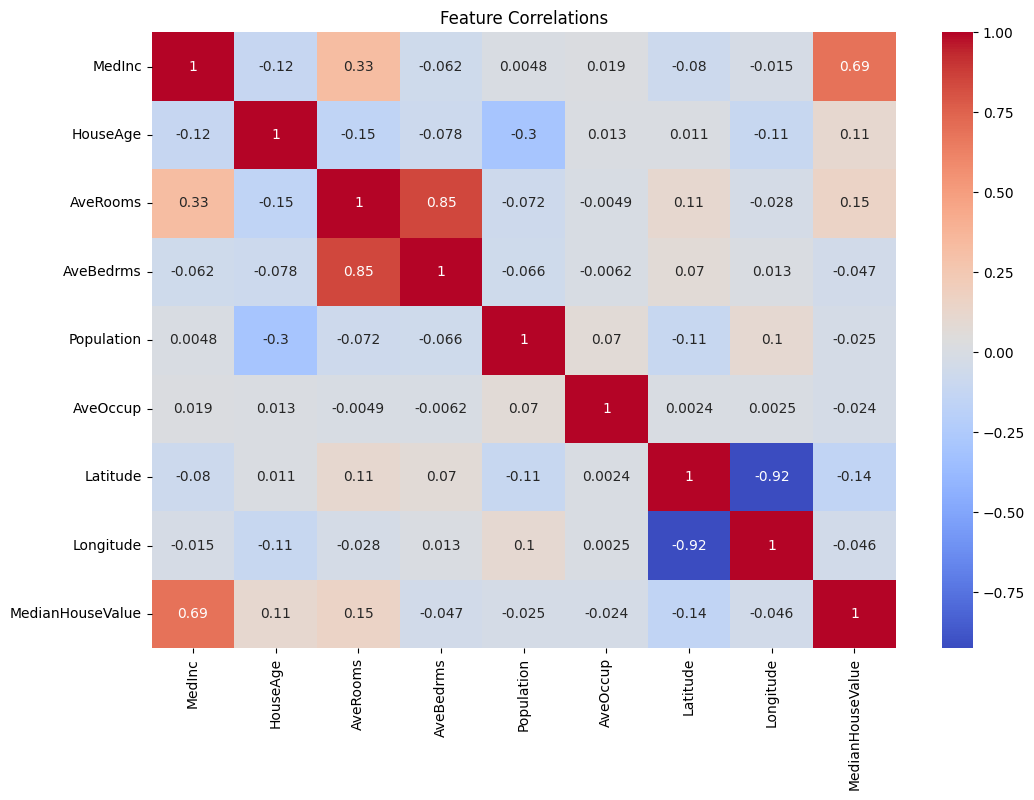

In [6]:
# Step 4: Explore the Dataset
print("Dataset Info:\n", housing_df.info())
print("\nFirst 5 Rows:\n", housing_df.head())
print("\nStatistical Summary:\n", housing_df.describe())

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [7]:
# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

# Metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 0.5558915986952422
R² Score: 0.5757877060324524


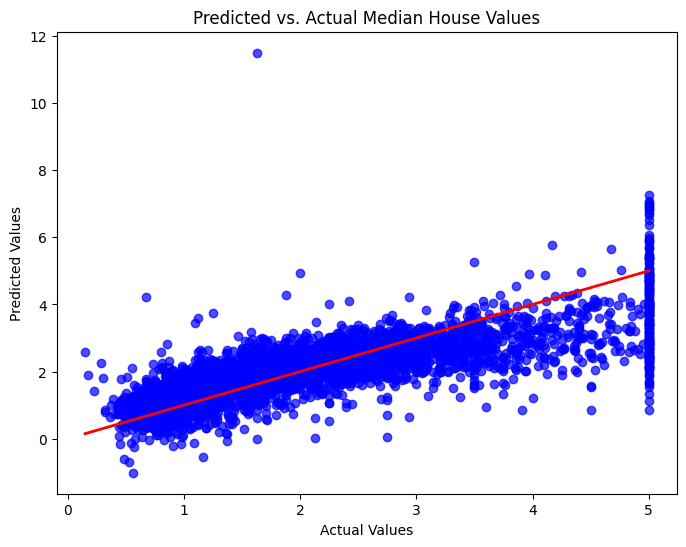

In [10]:
# Step 8: Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Predicted vs. Actual Median House Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()